<a href="https://colab.research.google.com/github/maheshmlpn/AI-LLM/blob/main/langraph_workflow_simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
pip install langgraph

In [27]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [28]:
# define state

class BMIState(TypedDict):
  weight_kg : float
  height_m : float
  bmi : float
  obesity: str

In [29]:

def calculate_bmi(state: BMIState) -> BMIState:
  weight_kg = state.get('weight_kg')
  height_m = state.get('height_m')

  bmi = weight_kg/ (height_m**2)
  state['bmi'] = bmi

  return state

In [30]:
def calculate_obsesity(state: BMIState) -> BMIState:
  bmi = state.get('bmi')
  obesity = None

  if bmi < 18.5:
    obesity = 'Underweight'
  if bmi >=18.5 and bmi < 25:
      obesity = "Normal"
  if bmi >= 25 and bmi < 30:
    obesity = 'Overweight'
  if bmi >= 30:
    obesity = 'Obesity'

  state['obesity'] = obesity

  return state

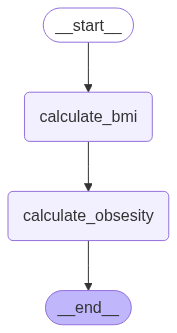

In [31]:
#define your graph

bmi_graph = StateGraph(BMIState)

# add nodes to graph
bmi_graph.add_node("calculate_bmi", calculate_bmi)
bmi_graph.add_node("calculate_obsesity", calculate_obsesity)

# add edges to your graph

bmi_graph.add_edge(START, "calculate_bmi")
bmi_graph.add_edge("calculate_bmi", "calculate_obsesity")
bmi_graph.add_edge("calculate_obsesity", END)

# compile graph

bmi_workflow = bmi_graph.compile()

display(bmi_workflow)


In [32]:

# execute graph

final_state = bmi_workflow.invoke(BMIState(weight_kg=80, height_m=1.77))

print(final_state)

{'weight_kg': 80, 'height_m': 1.77, 'bmi': 25.53544639152223, 'obesity': 'Overweight'}
